In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
sns.set_style("white")
from windrose import WindroseAxes 
from windrose import WindAxes
import matplotlib.cm as cm
import warnings


In [3]:
Data = pd.read_csv('la-haute-borne-data-2013-2016.csv', delimiter = ';')
Basic_Data_drop_Sort = pd.read_csv('Basic_Data_drop_Sort.csv', delimiter = ',')

In [4]:
Basic_Data_drop_sort = (Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wa_avg < 360]) # included to remove the 6 datapoints that 
# were at 360 or 0 degrees to allow for more accurate averging wind direction

In [5]:
Basic_Data_drop_Sort.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80736,2012-12-31 23:00:00,286.19,7.64,801.22998,16.950001
1,R80790,2012-12-31 23:00:00,175.05,8.56,1091.81990,17.180000
2,R80711,2012-12-31 23:00:00,165.25,8.96,1072.65000,17.180000
3,R80721,2012-12-31 23:00:00,163.16,7.25,679.69000,16.360001
4,R80790,2012-12-31 23:10:00,178.00,8.91,1113.45000,17.180000


In [7]:
#
# We have to process our data to make it fit with normal usage i.e. obey the cutin speed of 3.5 ms^-1
#
Basic_Data_drop_Sort = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Ws_avg > 3.5] # cutin speed from manual
Basic_Data_drop_Sort = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Ws_avg < 25] # cut out speed from manual
Basic_Data_drop_Sort = Basic_Data_drop_Sort[Basic_Data_drop_Sort.P_avg < 2050] # nominal power vaule (max safe)
Basic_Data_drop_Sort = Basic_Data_drop_Sort[Basic_Data_drop_Sort.P_avg > 0] # -ve power is pointless



Basic_Data_drop_Sort_R80711 = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wind_turbine_name == 'R80711']
Basic_Data_drop_Sort_R80721 = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wind_turbine_name == 'R80721']
Basic_Data_drop_Sort_R80736 = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wind_turbine_name == 'R80736']
Basic_Data_drop_Sort_R80790 = Basic_Data_drop_Sort[Basic_Data_drop_Sort.Wind_turbine_name == 'R80790']

lenR80711 = len(Basic_Data_drop_Sort_R80711)
lenR80721 = len(Basic_Data_drop_Sort_R80721)
lenR80736 = len(Basic_Data_drop_Sort_R80736)
lenR80790 = len(Basic_Data_drop_Sort_R80790)

# Due to the drawbacks with grouped data we create the ungrouped data for each turbine
Basic_Data_drop_Group = Basic_Data_drop_Sort.groupby('Wind_turbine_name')

display(Basic_Data_drop_Group.Ws_avg.describe())
display(Basic_Data_drop_Group.Wa_avg.describe())
display(Basic_Data_drop_Group.P_avg.describe())
display(Basic_Data_drop_Group.Rs_avg.describe())

# Ws_avg = average wind speed (m/s)
# Wa_avg = average wind direction (deg)
# P_avg  = average power output (kW)
# Rs_avg = average rotor speed (RPM)
# Data is scrambled by default so needs to be sorted for a better plot

,count,mean,std,min,25%,50%,75%,max
Wind_turbine_name,,,,,,,,
R80711,168148.0,6.502034,1.973547,3.51,5.12,6.12,7.37,20.480000
R80721,160267.0,6.141071,1.771318,3.51,4.93,5.80,6.89,19.219999
R80736,160701.0,6.253675,1.914772,3.51,4.93,5.85,7.04,20.570000
R80790,136505.0,6.305865,2.002764,3.51,4.93,5.86,7.10,20.469999


,count,mean,std,min,25%,50%,75%,max
Wind_turbine_name,,,,,,,,
R80711,168148.0,178.456772,93.709469,0.0,92.247500,197.53999,245.78999,360.0
R80721,160267.0,177.185915,93.496417,0.0,91.744999,197.19000,242.69000,360.0
R80736,160701.0,181.948988,93.167842,0.0,118.520000,200.10001,245.92999,360.0
R80790,136505.0,180.279515,91.636326,0.0,106.390000,198.46001,243.23000,360.0


,count,mean,std,min,25%,50%,75%,max
Wind_turbine_name,,,,,,,,
R80711,168148.0,477.865665,453.253991,0.01,135.64999,325.48001,675.71002,2049.9700
R80721,160267.0,401.816112,401.445031,0.02,115.30500,263.53000,545.15997,2049.8201
R80736,160701.0,433.987274,439.919249,0.01,118.33000,276.10999,591.14001,2049.9199
R80790,136505.0,455.937456,447.577368,0.02,126.87000,296.51001,634.57001,2049.8999


,count,mean,std,min,25%,50%,75%,max
Wind_turbine_name,,,,,,,,
R80711,168148.0,13.334495,2.987786,0.37,10.66,13.41,16.370001,17.219999
R80721,160267.0,12.832210,2.898242,0.80,10.28,12.62,15.490000,17.219999
R80736,160701.0,12.970301,2.950856,0.41,10.33,12.78,15.830000,17.219999
R80790,136505.0,13.148870,2.970432,0.58,10.49,13.04,16.120001,17.209999


In [6]:
len(Basic_Data_drop_Sort[Basic_Data_drop_Sort.Rs_avg < 8.5]) # from manual the minimum 

11278

In [8]:
Basic_Data_drop_Sort_R80711 = Basic_Data_drop_Sort_R80711.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort_R80711.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80711,2012-12-31 23:00:00,165.25000,8.960000,1072.6500,17.18
1,R80711,2012-12-31 23:10:00,168.28999,8.890000,1061.4301,17.17
2,R80711,2012-12-31 23:20:00,170.08000,9.190000,1144.7900,17.18
3,R80711,2012-12-31 23:30:00,175.33000,8.920000,1183.9800,17.18
4,R80711,2012-12-31 23:40:00,173.07001,9.479999,1317.5500,17.18


In [9]:
Basic_Data_drop_Sort_R80721 = Basic_Data_drop_Sort_R80721.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort_R80721.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80721,2012-12-31 23:00:00,163.16,7.25,679.69000,16.360001
1,R80721,2012-12-31 23:10:00,162.42,7.77,867.40997,17.000000
2,R80721,2012-12-31 23:20:00,165.98,8.01,948.92999,17.120001
3,R80721,2012-12-31 23:30:00,168.03,8.61,1099.06010,17.170000
4,R80721,2012-12-31 23:40:00,171.48,8.55,1003.62000,17.090000


In [10]:
Basic_Data_drop_Sort_R80736 = Basic_Data_drop_Sort_R80736.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort_R80736.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80736,2012-12-31 23:00:00,286.19000,7.64,801.22998,16.950001
1,R80736,2012-12-31 23:10:00,288.32999,8.31,943.16998,17.139999
2,R80736,2012-12-31 23:20:00,293.04001,8.47,998.48999,17.150000
3,R80736,2012-12-31 23:30:00,294.01999,8.06,837.96002,16.910000
4,R80736,2012-12-31 23:40:00,299.22000,8.03,871.57001,16.920000


In [11]:
Basic_Data_drop_Sort_R80790 = Basic_Data_drop_Sort_R80790.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort_R80790.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80790,2012-12-31 23:00:00,175.05000,8.56,1091.8199,17.18
1,R80790,2012-12-31 23:10:00,178.00000,8.91,1113.4500,17.18
2,R80790,2012-12-31 23:20:00,179.69000,9.08,1147.5400,17.18
3,R80790,2012-12-31 23:30:00,181.39999,9.29,1181.0601,17.17
4,R80790,2012-12-31 23:40:00,185.14000,9.06,1082.5601,17.17


In [12]:
Basic_Data_drop_Sort = Basic_Data_drop_Sort.reset_index()[['Wind_turbine_name','Date_time','Wa_avg' ,'Ws_avg','P_avg', 'Rs_avg']]
Basic_Data_drop_Sort.head()

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80736,2012-12-31 23:00:00,286.19,7.64,801.22998,16.950001
1,R80790,2012-12-31 23:00:00,175.05,8.56,1091.81990,17.180000
2,R80711,2012-12-31 23:00:00,165.25,8.96,1072.65000,17.180000
3,R80721,2012-12-31 23:00:00,163.16,7.25,679.69000,16.360001
4,R80790,2012-12-31 23:10:00,178.00,8.91,1113.45000,17.180000


<Figure size 1600x1600 with 0 Axes>

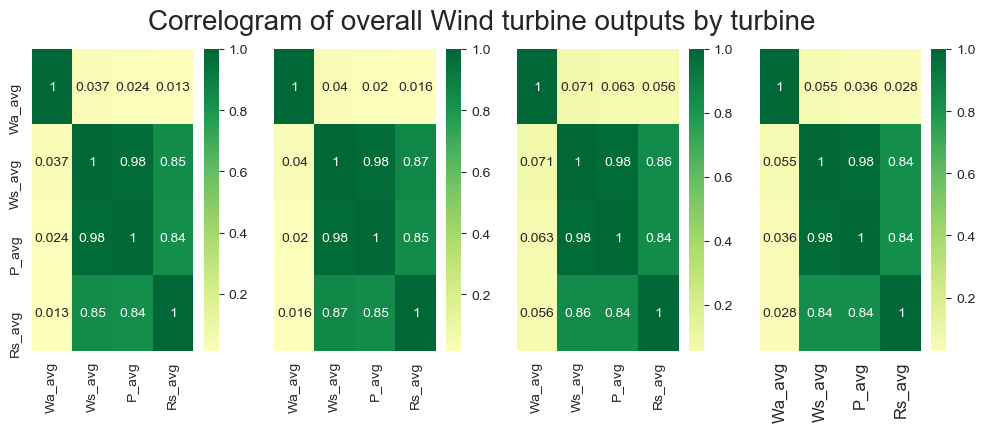

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot
plt.figure(figsize=(20,20), dpi= 80)
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=True, dpi=100)
sns.heatmap(Basic_Data_drop_Sort_R80711.corr(), xticklabels=Basic_Data_drop_Sort_R80711.corr().columns, label = 'R80711',
            yticklabels=Basic_Data_drop_Sort_R80711.corr().columns, cmap='RdYlGn', center=0, annot=True, ax = axes[0])
sns.heatmap(Basic_Data_drop_Sort_R80721.corr(), xticklabels=Basic_Data_drop_Sort_R80721.corr().columns, label = 'R80721',
            yticklabels=Basic_Data_drop_Sort_R80721.corr().columns, cmap='RdYlGn', center=0, annot=True, ax = axes[1])
sns.heatmap(Basic_Data_drop_Sort_R80736.corr(), xticklabels=Basic_Data_drop_Sort_R80736.corr().columns, label = 'R80736', 
            yticklabels=Basic_Data_drop_Sort_R80736.corr().columns, cmap='RdYlGn', center=0, annot=True, ax = axes[2])
sns.heatmap(Basic_Data_drop_Sort_R80790.corr(), xticklabels=Basic_Data_drop_Sort_R80790.corr().columns, label = 'R80790',
            yticklabels=Basic_Data_drop_Sort_R80790.corr().columns, cmap='RdYlGn', center=0, annot=True, ax = axes[3])
# Decorations
plt.suptitle('Correlogram of overall Wind turbine outputs by turbine', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.savefig('Correlogram of overall Wind turbine outputs by turbine.pdf')

In [14]:
Basic_Data_drop_Group.cov()

P_avg       Rs_avg       Wa_avg      Ws_avg
Wind_turbine_name                                                            
R80711            P_avg   205439.180756  1138.282567  1011.311501  874.650470
                  Rs_avg    1138.282567     8.926862     3.530154    4.998613
                  Wa_avg    1011.311501     3.530154  8781.464643    6.826404
                  Ws_avg     874.650470     4.998613     6.826404    3.894890
R80721            P_avg   161158.112720   988.621754   758.658891  695.416882
                  Rs_avg     988.621754     8.399806     4.224972    4.452016
                  Wa_avg     758.658891     4.224972  8741.580064    6.677864
                  Ws_avg     695.416882     4.452016     6.677864    3.137568
R80736            P_avg   193528.945936  1092.483838  2577.214589  824.329924
                  Rs_avg    1092.483838     8.707552    15.431644    4.846815
                  Wa_avg    2577.214589    15.431644  8680.246848   12.666470
                  Ws_avg     824.329924     4.846815    12.666470    3.666351
R80790            P_avg   200325.500070  1121.176377  1466.762370  876.493085
                  Rs_avg    1121.176377     8.823465     7.604184    4.988868
                  Wa_avg    1466.762370     7.604184  8397.216155   10.171009
                  Ws_avg     876.493085     4.988868    10.171009    4.011066

In [15]:
print('Number of data points per turbine: ' +
      str(lenR80711) + ', ' + str(lenR80721) + ', ' + str(lenR80736) + ', ' + str(lenR80790))
# something must be wrong with 90 loosing almost 24 thou more than the others

Number of data points per turbine: 168148, 160267, 160701, 136505


In [16]:
def Power_Efficiency(k):
    C_d = []
    for i in range(len(k)):
        Cp = (2000*k.loc[i, 'P_avg']/(rho*A*(k.loc[i,'Ws_avg']**3)))
        C_d.append(Cp)
    Power_Conversion = np.asarray(C_d)
    return Power_Conversion # Calculate power efficiency input k being the name of the dataframe

def Lambda(k):
    Lambda_d = []
    for i in range(len(k)):
        Lambda_i = ((k.loc[i, 'Rs_avg']*math.pi*D)/60)/k.loc[i, 'Ws_avg']
        Lambda_d.append(Lambda_i)
    Lambda = np.asarray(Lambda_d)
    return Lambda # Calculate the tip speed ratio input k being the name of the dataframe

def DataFrame_creation(k,l,m,n):
    Dict_2_var = {k:l, m:n}
    Two_var_df = pd.DataFrame(data=Dict_2_var)
    return Two_var_df # Changes 2 variables into a data frame input k and m are the text names 
                      # for the columns whilst l and n are the names of the data in the code

def Moving_Average(k,l):
    cumsum_vec = []
    Ma_vec = []
    span = int(len(k)/l)
    for i in range(span-1):
        cumsum_vec = np.cumsum(k)
        Ma_vec_i = (cumsum_vec[i*l+(l)]-cumsum_vec[i*l])/l
        Ma_vec.append(Ma_vec_i)
    Ma_vec = np.asarray(Ma_vec)
    return Ma_vec # Creates a vector of moving averages input k is the data used for calculation
                  # while l is the window width for the calculation of the mean

In [17]:
Cp = 0.593
P_out = Basic_Data_drop_Sort_R80711.P_avg/1000
A = 5281
D = 82
rho = 1.0898 #calculated using online calculator https://www.engineersedge.com/calculators/air-density.htm 
PowerCalc = (Basic_Data_drop_Sort_R80711.Ws_avg**3)*A*rho/2
PowerCalc = PowerCalc/1000000
#
#P_avg = 1/2 * rho * A * Rs_avg^3 * C_p
#C_p = 2000* P_avg/rho* A * Ws_avg^3  due to P_avg being measured in kW
#C_p is not constant but relates to tip speed ratio =  (Rs_avg*pi*D / 60)/ Ws_avg
# the usual way to display this is by plotting c_p against tip ratio lambda

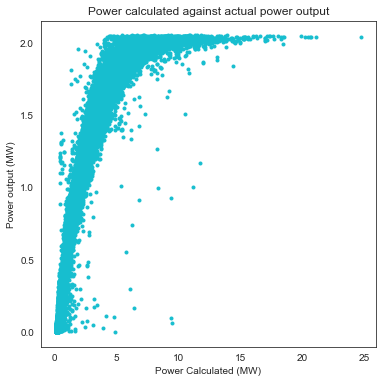

In [18]:
plt.figure(figsize = (6,6))
plt.plot(PowerCalc,P_out, 'C9.')
plt.ylabel('Power output (MW)')
plt.xlabel('Power Calculated (MW)')
plt.title('Power calculated against actual power output')
plt.savefig('Power calculated against actual power output.pdf')

In [184]:
Ma_vec_C_p_R80711 = Moving_Average(C_p_Lambda_R80711_df_sort.C_p,10)
display(len(Ma_vec_C_p_R80711))
len(C_p_Lambda_R80711_df_sort.C_p)

16813

168148

In [185]:
Ma_vec_Lambda_R80711 = Moving_Average(C_p_Lambda_R80711_df_sort.Lambda,10)
display(len(Ma_vec_Lambda_R80711))

16813

In [186]:
C_p_Lambda_R80711_ma_df = DataFrame_creation('C_p',Ma_vec_C_p_R80711,'Lambda',Ma_vec_Lambda_R80711)
C_p_Lambda_R80711_ma_df.describe()

,C_p,Lambda
count,16813.000000,16813.000000
mean,0.437647,8.989593
std,0.113847,1.029307
min,0.023608,0.644960
25%,0.369273,8.754684
50%,0.446957,9.207089
75%,0.521085,9.569609
max,1.194880,12.085478


Text(2, 0.6, 'Betz limit')

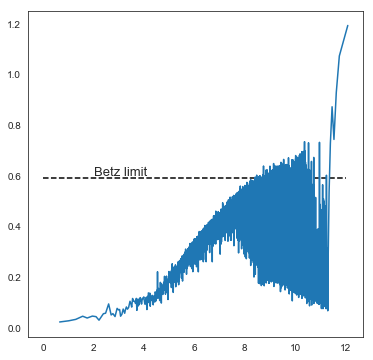

In [187]:
plt.figure(figsize = (6,6))
plt.plot(C_p_Lambda_R80711_ma_df.Lambda,C_p_Lambda_R80711_ma_df.C_p)
plt.hlines(0.593,xmin=0,xmax = 12, linestyles = 'dashed', label = 'Betz limit')
plt.annotate('Betz limit', xy = (2,0.6),fontsize = 13)

In [22]:
Power_Conversion_R80711 = Power_Efficiency(Basic_Data_drop_Sort_R80711)
display(len(Power_Conversion_R80711))
Power_Conversion_R80721 = Power_Efficiency(Basic_Data_drop_Sort_R80721)
display(len(Power_Conversion_R80721))
Power_Conversion_R80736 = Power_Efficiency(Basic_Data_drop_Sort_R80736)
display(len(Power_Conversion_R80736))
Power_Conversion_R80790 = Power_Efficiency(Basic_Data_drop_Sort_R80790)
display(len(Power_Conversion_R80790))

168148

160267

160701

136505

In [23]:
Lambda_R80711 = Lambda(Basic_Data_drop_Sort_R80711)
display(len(Lambda_R80711))
Lambda_R80721 = Lambda(Basic_Data_drop_Sort_R80721)
display(len(Lambda_R80721))
Lambda_R80736 = Lambda(Basic_Data_drop_Sort_R80736)
display(len(Lambda_R80736))
Lambda_R80790 = Lambda(Basic_Data_drop_Sort_R80790)
display(len(Lambda_R80790))

168148

160267

160701

136505

In [27]:
C_p_Lambda_R80711_df = DataFrame_creation('C_p',Power_Conversion_R80711,'Lambda',Lambda_R80711)
display(C_p_Lambda_R80711_df.describe())
C_p_Lambda_R80721_df = DataFrame_creation('C_p',Power_Conversion_R80721,'Lambda',Lambda_R80721)
display(C_p_Lambda_R80721_df.describe())
C_p_Lambda_R80736_df = DataFrame_creation('C_p',Power_Conversion_R80736,'Lambda',Lambda_R80736)
display(C_p_Lambda_R80736_df.describe())
C_p_Lambda_R80790_df = DataFrame_creation('C_p',Power_Conversion_R80790,'Lambda',Lambda_R80790)
display(C_p_Lambda_R80790_df.describe())

# 50% of the data is between 8.7 and 9.8 even though the minimum is as small as 0 and maximum can reaching 11.8 (limited due to
# the maximum tip speed of 73.4)
#

,C_p,Lambda
count,168148.000000,168148.000000
mean,0.437844,8.989979
std,0.146009,1.030376
min,0.000076,0.285465
25%,0.336319,8.754717
50%,0.463038,9.207156
75%,0.548794,9.569788
max,2.840700,14.114298


,C_p,Lambda
count,160267.000000,160267.000000
mean,0.431998,9.108904
std,0.144877,0.951489
min,0.000103,0.618407
25%,0.328300,8.897974
50%,0.453263,9.280818
75%,0.546638,9.612079
max,1.698000,11.986921


,C_p,Lambda
count,160701.000000,160701.000000
mean,0.437266,9.082782
std,0.142380,1.003049
min,0.000063,0.262993
25%,0.334086,8.895438
50%,0.456933,9.286843
75%,0.551312,9.615043
max,1.628809,12.419645


,C_p,Lambda
count,136505.000000,136505.000000
mean,0.457088,9.169611
std,0.153963,1.095069
min,0.000121,0.262960
25%,0.349630,8.929867
50%,0.476644,9.398508
75%,0.573045,9.787356
max,2.130160,13.157034


In [168]:
print((210095-len(Lambda_R80711))/210095*100,
(210095-len(Lambda_R80721))/210095*100,
(210095-len(Lambda_R80736))/210095*100,
(210095-len(Lambda_R80790))/210095*100)

19.96572978890502 23.71688997834313 23.510316761465052 35.027011589995


In [169]:
print('We can see that almost the amount of data where the wind speed or the turbine rotating = 0 is around 20-35% of the time')

We can see that almost the amount of data where the wind speed or the turbine rotating = 0 is around 20-35% of the time


In [25]:
C_p_Lambda_R80711_df = C_p_Lambda_R80711_df[C_p_Lambda_R80711_df.C_p <0.59]
display(len(C_p_Lambda_R80711_df))
print(len(Lambda_R80711) - len(C_p_Lambda_R80711_df))
# Printed is the number removed due to going above the Betz limit which is impossible and only happens due to the limitation of the chosen
# method to calculate C_p

145910

22238


In [50]:
C_p_Lambda_R80721_df = C_p_Lambda_R80721_df[C_p_Lambda_R80721_df.C_p <0.59]
display(len(C_p_Lambda_R80721_df))
print(len(Lambda_R80721) - len(C_p_Lambda_R80721_df))

139816

20451


In [51]:
C_p_Lambda_R80736_df = C_p_Lambda_R80736_df[C_p_Lambda_R80736_df.C_p <0.59]
display(len(C_p_Lambda_R80736_df))
print(len(Lambda_R80736) - len(C_p_Lambda_R80736_df))

138221

22480


In [52]:
C_p_Lambda_R80790_df = C_p_Lambda_R80790_df[C_p_Lambda_R80790_df.C_p <0.59]
display(len(C_p_Lambda_R80790_df))
print(len(Lambda_R80790) - len(C_p_Lambda_R80790_df))
# Again R80790 seems to display an unusual amount of anomalous data 8000 more than the others

108501

28004


In [53]:
2050000/(1.0898*5281*14.5**3) #The power conversion efficiency at the rated level

0.11683874496097821

In [174]:
C_p_Lambda_R80711_df_sort = C_p_Lambda_R80711_df.sort_values(by =['Lambda'])
C_p_Lambda_R80711_df_sort = C_p_Lambda_R80711_df_sort.reset_index()[['C_p','Lambda']]
len(C_p_Lambda_R80711_df_sort)

168148

In [94]:
cumsum_vec = np.cumsum(C_p_Lambda_R80711_df_sort.C_p)

display(cumsum_vec[9]/10)
(cumsum_vec[120019]-cumsum_vec[120010])/10

145910

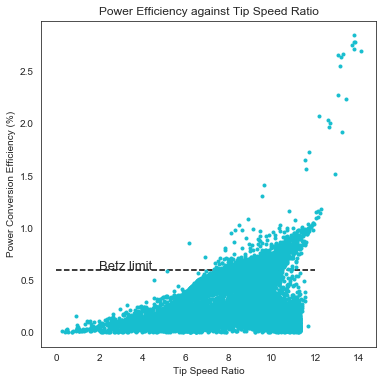

In [28]:
#window_width = 10
#cumsum_vec = np.cumsum(np.insert(C_p_Lambda_R80711_df.C_p, 0, 0)) 
#ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
#plt.plot(C_p_Lambda_R80711_df.Lambda,ma_vec)


plt.figure(figsize = (6,6))
plt.plot(C_p_Lambda_R80711_df.Lambda,C_p_Lambda_R80711_df.C_p, 'C9.')
plt.ylabel('Power Conversion Efficiency (%)')
plt.xlabel('Tip Speed Ratio')
plt.title('Power Efficiency against Tip Speed Ratio')
plt.hlines(0.593,xmin=0,xmax = 12, linestyles = 'dashed', label = 'Betz limit')
plt.annotate('Betz limit', xy = (2,0.6),fontsize = 13)
plt.savefig('Power Efficiency against Tip Speed Ratio with anomalous data.pdf')

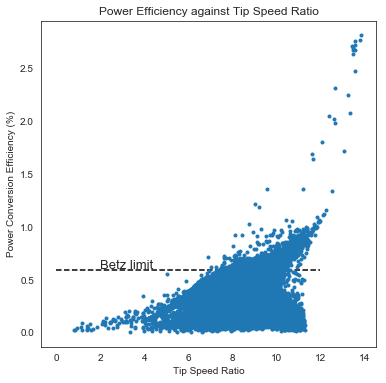

In [47]:
C_p_Lambda_R80711_df_mean = C_p_Lambda_R80711_df.rolling(2).mean()
plt.figure(figsize = (6,6))
plt.plot(C_p_Lambda_R80711_df_mean.Lambda,C_p_Lambda_R80711_df_mean.C_p, 'C0.')
plt.ylabel('Power Conversion Efficiency (%)')
plt.xlabel('Tip Speed Ratio')
plt.title('Power Efficiency against Tip Speed Ratio')
plt.hlines(0.593,xmin=0,xmax = 12, linestyles = 'dashed', label = 'Betz limit')
plt.annotate('Betz limit', xy = (2,0.6),fontsize = 13)
plt.savefig('Power_Efficiency_against_Tip_Speed_Ratio_mean.pdf')
# not sure how best to display this since adding a rolling mean doesn't clear up the data the way I want.
# The data appears to follow the general curve of lambda/C_p, however we only 

In [47]:
Basic_Data_drop_Sort.Rs_avg.max()*math.pi*D/60 # which is just higher than the max tip speed shown in the manual (73.4)

73.93423721607222

In [39]:
display(Basic_Data_drop_Sort_R80736.mode()) # mode shows us that the most common wind speed is 5.35 while the most common rotor speed is 9.23
display(Basic_Data_drop_Sort_R80736.describe()) #However the mean value states that the average wind speed is 6.25 with 12.97 for the Rotor speed implying
Basic_Data_drop_Sort_R80736.Rs_avg.mean()*math.pi*D/60/Basic_Data_drop_Sort_R80736.Ws_avg.mean() # a mean lambda using those values is 8.904
Basic_Data_drop_Sort_R80736.Rs_avg.mode()*math.pi*D/60/Basic_Data_drop_Sort_R80736.Ws_avg.mode() # and a modal Lambda of 7.407
# We see the actual modal value for Lambda and the actual average value to be 10.540 and 9.070 respectively.  

,Wind_turbine_name,Date_time,Wa_avg,Ws_avg,P_avg,Rs_avg
0,R80736,2013-03-31 01:00:00,216.80,5.35,77.160004,9.229999
1,NaN,2013-03-31 01:10:00,217.42,NaN,NaN,NaN
2,NaN,2013-03-31 01:20:00,NaN,NaN,NaN,NaN
3,NaN,2013-03-31 01:30:00,NaN,NaN,NaN,NaN
4,NaN,2013-03-31 01:40:00,NaN,NaN,NaN,NaN
5,NaN,2013-03-31 01:50:00,NaN,NaN,NaN,NaN
6,NaN,2014-03-30 01:00:00,NaN,NaN,NaN,NaN
7,NaN,2014-03-30 01:10:00,NaN,NaN,NaN,NaN
8,NaN,2014-03-30 01:20:00,NaN,NaN,NaN,NaN
9,NaN,2014-03-30 01:30:00,NaN,NaN,NaN,NaN


,Wa_avg,Ws_avg,P_avg,Rs_avg
count,160701.000000,160701.000000,160701.000000,160701.000000
mean,181.948988,6.253675,433.987274,12.970301
std,93.167842,1.914772,439.919249,2.950856
min,0.000000,3.510000,0.010000,0.410000
25%,118.520000,4.930000,118.330000,10.330000
50%,200.100010,5.850000,276.109990,12.780000
75%,245.929990,7.040000,591.140010,15.830000
max,360.000000,20.570000,2049.919900,17.219999


0    7.407308
dtype: float64

In [55]:
(9.66*math.pi*D/60)/Basic_Data_drop_Sort_R80736.loc[63461].Ws_avg
# The Highest Lambda value is due to a slightly

11.65036724093516

In [89]:
print('PLOTS BE HERE!!')

PLOTS BE HERE!!


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Density plots for Power produced (kW) by Wind turbine')

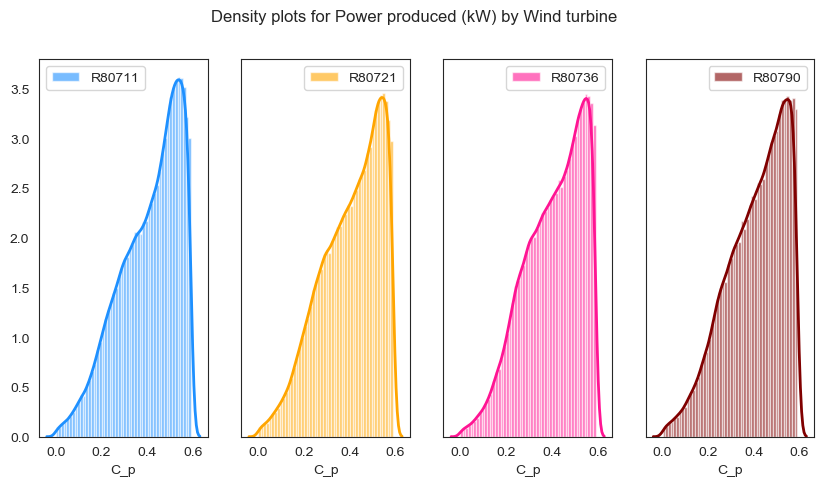

In [57]:
x1 = Power_Conversion_R80711[Power_Conversion_R80711 < 0.59] # 0.59 C_p is the theoretical limit Betz limit
x2 = Power_Conversion_R80721[Power_Conversion_R80721 < 0.59]
x3 = Power_Conversion_R80736[Power_Conversion_R80736 < 0.59]
x4 = Power_Conversion_R80790[Power_Conversion_R80790 < 0.59]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='C_p',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='C_p', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='C_p', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='C_p', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Power produced (kW) by Wind turbine')

Text(0.5, 0.98, 'Density plots for the Tip Speed Ratio by Wind Turbine')

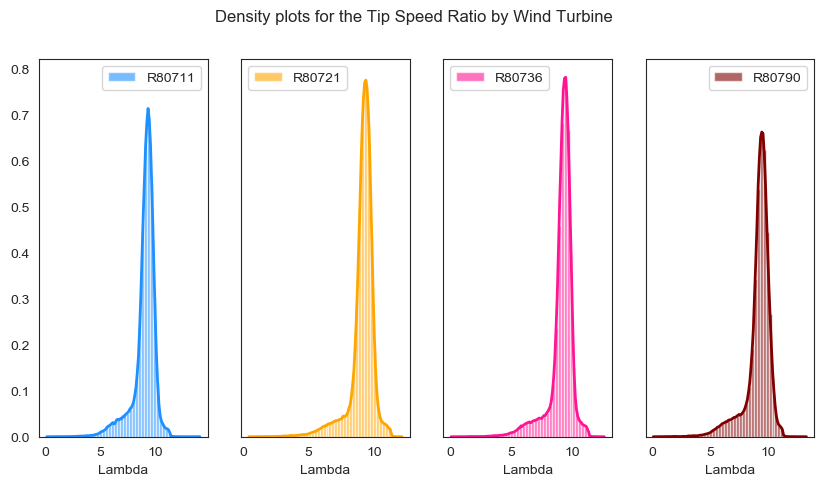

In [59]:
x1 = Lambda_R80711[0<Lambda_R80711]
x1 = x1[x1<14]
x2 = Lambda_R80721[0<Lambda_R80721]
x2 = x2[x2<14]
x3 = Lambda_R80736[0<Lambda_R80736]
x3 = x3[x3<14]
x4 = Lambda_R80790[0<Lambda_R80790]
x4 = x4[x4<14]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='Lambda',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='Lambda', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='Lambda', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='Lambda', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for the Tip Speed Ratio by Wind Turbine')

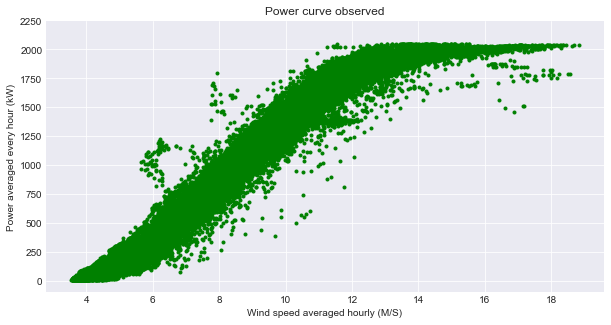

In [44]:
Basic_Data_drop_Sort_P_avg_Ws_avg_mean = Basic_Data_drop_Sort_P_avg_Ws_avg.rolling(6).mean() # Hourly
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(Basic_Data_drop_Sort_P_avg_Ws_avg_mean.Ws_avg, Basic_Data_drop_Sort_P_avg_Ws_avg_mean.P_avg, 'g.')
plt.ylabel('Power averaged every hour (kW)')
plt.xlabel('Wind speed averaged hourly (M/S)')
plt.title('Power curve observed')
plt.yticks(np.arange(0, 2500, step=250))
plt.savefig('Power_curve_observed_rolling_mean_hourly.pdf')
# include the actual power curve from the specs power curve is shown rather well which shows that the data recorded follows normal 
# working metrics.

D:\Anaconda\lib\site-packages\windrose\windrose.py:457: MatplotlibDeprecationWarning: The poly_between function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  xs, ys = poly_between(angles, 0, val)


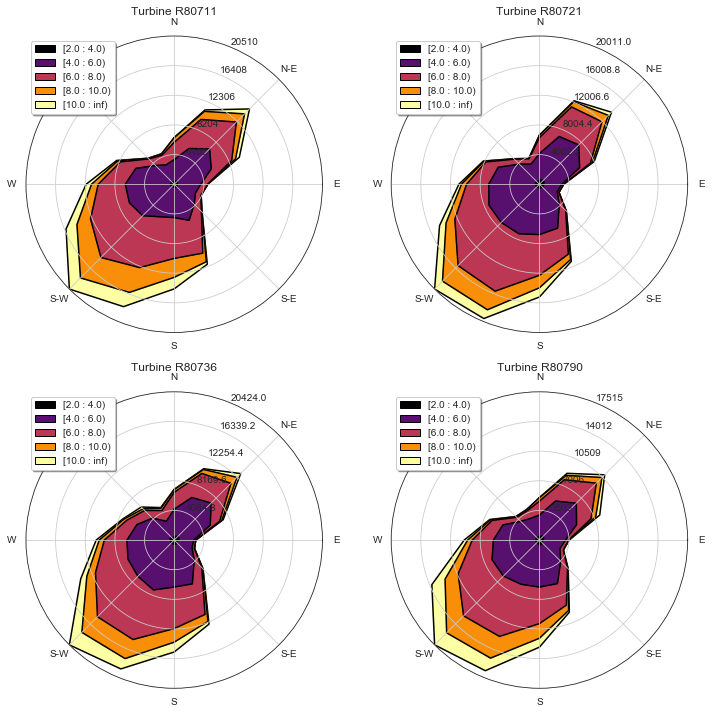

In [61]:
warnings.filterwarnings(action='once')
f = plt.figure(figsize=(12,12))

ax1 = f.add_subplot(221,projection='windrose')
ax1.set_title('Turbine R80711')

ax1.contourf(Basic_Data_drop_Sort_R80711.Wa_avg,
             Basic_Data_drop_Sort_R80711.Ws_avg,
             cmap = cm.inferno, bins = np.arange(2, 12, 2))
ax1.contour(Basic_Data_drop_Sort_R80711.Wa_avg,
            Basic_Data_drop_Sort_R80711.Ws_avg,
            colors = 'black', bins = np.arange(2, 12, 2))
Legend1 = ax1.legend(loc='upper left',shadow=True,frameon = True)
Legend1.get_frame().set_facecolor('white')

ax2 = f.add_subplot(222,projection='windrose')
ax2.set_title('Turbine R80721')

ax2.contourf(Basic_Data_drop_Sort_R80721.Wa_avg,
             Basic_Data_drop_Sort_R80721.Ws_avg,
             cmap = cm.inferno, bins = np.arange(2, 12, 2))
ax2.contour(Basic_Data_drop_Sort_R80721.Wa_avg,
            Basic_Data_drop_Sort_R80721.Ws_avg,
            colors = 'black', bins = np.arange(2, 12, 2))
Legend2 = ax2.legend(loc='upper left',shadow=True,frameon = True)
Legend2.get_frame().set_facecolor('white')

ax3 = f.add_subplot(223,projection='windrose')
ax3.set_title('Turbine R80736')

ax3.contourf(Basic_Data_drop_Sort_R80736.Wa_avg,
             Basic_Data_drop_Sort_R80736.Ws_avg,
             cmap = cm.inferno, bins = np.arange(2, 12, 2))
ax3.contour(Basic_Data_drop_Sort_R80736.Wa_avg,
            Basic_Data_drop_Sort_R80736.Ws_avg,
            colors = 'black', bins = np.arange(2, 12, 2))
Legend3 = ax3.legend(loc='upper left',shadow=True,frameon = True)
Legend3.get_frame().set_facecolor('white')

ax4 = f.add_subplot(224,projection='windrose')
ax4.set_title('Turbine R80790')

ax4.contourf(Basic_Data_drop_Sort_R80790.Wa_avg,
             Basic_Data_drop_Sort_R80790.Ws_avg,
             cmap = cm.inferno, bins = np.arange(2, 12, 2))
ax4.contour(Basic_Data_drop_Sort_R80790.Wa_avg,
            Basic_Data_drop_Sort_R80790.Ws_avg,
            colors = 'black', bins = np.arange(2, 12, 2))
Legend4 = ax4.legend(loc='upper left',shadow=True,frameon = True)
Legend4.get_frame().set_facecolor('white')

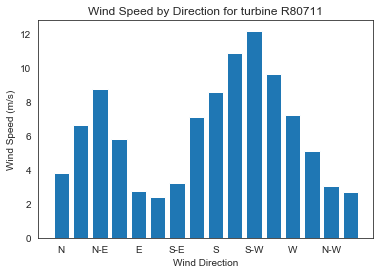

In [69]:
ax1.bar(Basic_Data_drop_Sort_R80711['Wa_avg'], Basic_Data_drop_Sort_R80711['Ws_avg'], normed=True, nsector=16)
table = ax1._info['table']
wd_freq = np.sum(table, axis=0)
direction = ax1._info['dir']
wd_freq = np.sum(table, axis=0)
plt.bar(np.arange(16), wd_freq, align='center')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed by Direction for turbine R80711')
xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
xticks=np.arange(16)
plt.gca().set_xticks(xticks)
plt.draw()
plt.gca().set_xticklabels(xlabels)
plt.draw()


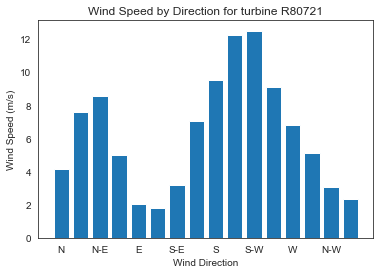

In [74]:
ax2.bar(Basic_Data_drop_Sort_R80721['Wa_avg'], Basic_Data_drop_Sort_R80721['Ws_avg'], normed=True, nsector=16)
table = ax2._info['table']
wd_freq = np.sum(table, axis=0)
direction = ax2._info['dir']
wd_freq = np.sum(table, axis=0)
plt.bar(np.arange(16), wd_freq, align='center')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed by Direction for turbine R80721')
xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
xticks=np.arange(16)
plt.gca().set_xticks(xticks)
plt.draw()
plt.gca().set_xticklabels(xlabels)
plt.draw()

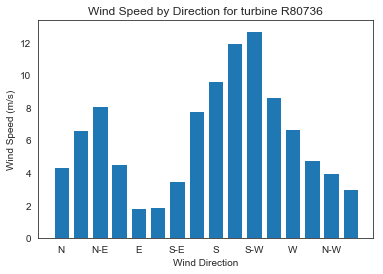

In [75]:
ax3.bar(Basic_Data_drop_Sort_R80736['Wa_avg'], Basic_Data_drop_Sort_R80736['Ws_avg'], normed=True, nsector=16)
table = ax3._info['table']
wd_freq = np.sum(table, axis=0)
direction = ax3._info['dir']
wd_freq = np.sum(table, axis=0)
plt.bar(np.arange(16), wd_freq, align='center')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed by Direction for turbine R80736')
xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
xticks=np.arange(16)
plt.gca().set_xticks(xticks)
plt.draw()
plt.gca().set_xticklabels(xlabels)
plt.draw()

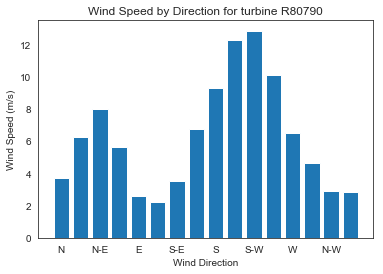

In [76]:
ax4.bar(Basic_Data_drop_Sort_R80790['Wa_avg'], Basic_Data_drop_Sort_R80790['Ws_avg'], normed=True, nsector=16)
table = ax4._info['table']
wd_freq = np.sum(table, axis=0)
direction = ax4._info['dir']
wd_freq = np.sum(table, axis=0)
plt.bar(np.arange(16), wd_freq, align='center')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed by Direction for turbine R80790')
xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
xticks=np.arange(16)
plt.gca().set_xticks(xticks)
plt.draw()
plt.gca().set_xticklabels(xlabels)
plt.draw()

(1, 3.281444231980619, 0, 7.2190468161593975)


None

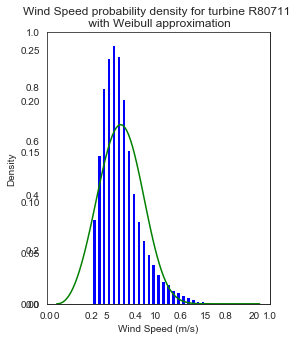

In [85]:
fig, axs = plt.subplots(1,1,figsize = (4,5) )

ax = WindAxes.from_ax(fig =fig)
bins = np.arange(3, 20 + 1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(Basic_Data_drop_Sort_R80711.Ws_avg, bins=bins)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.title('Wind Speed probability density for turbine R80711 \n with Weibull approximation')

display(print(params))
# displays 1,Shape parameter,0,scale parameter

(1, 3.3835293084266125, 0, 6.796255630563514)


None

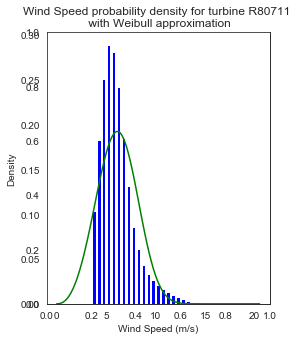

In [86]:
fig, axs = plt.subplots(1,1,figsize = (4,5))

ax = WindAxes.from_ax(fig =fig)
bins = np.arange(3, 20 + 1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(Basic_Data_drop_Sort_R80721.Ws_avg, bins=bins)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.title('Wind Speed probability density for turbine R80711 \n with Weibull approximation')

display(print(params))
# displays 1,Shape parameter,0,scale parameter

(1, 3.2232930271421454, 0, 6.945886250295753)


None

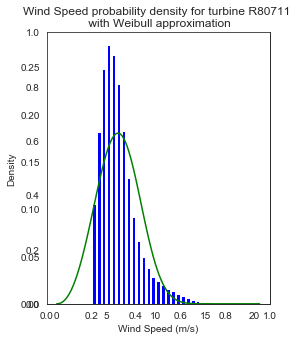

In [88]:
fig, axs = plt.subplots(1,1,figsize = (4,5))

ax = WindAxes.from_ax(fig =fig)
bins = np.arange(3, 20 + 1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(Basic_Data_drop_Sort_R80736.Ws_avg, bins=bins)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.title('Wind Speed probability density for turbine R80711 \n with Weibull approximation')

display(print(params))
# displays 1,Shape parameter,0,scale parameter

(1, 3.1237966006723723, 0, 7.018763161491201)


None

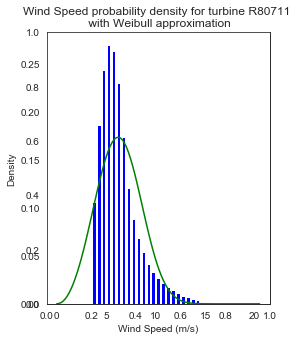

In [87]:
fig, axs = plt.subplots(1,1,figsize = (4,5))

ax = WindAxes.from_ax(fig =fig)
bins = np.arange(3, 20 + 1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(Basic_Data_drop_Sort_R80790.Ws_avg, bins=bins)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.title('Wind Speed probability density for turbine R80711 \n with Weibull approximation')

display(print(params))
# displays 1,Shape parameter,0,scale parameter

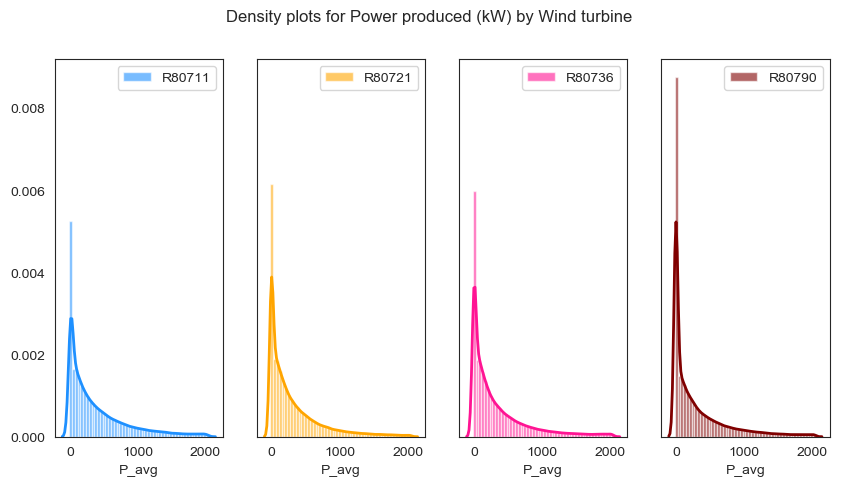

In [202]:
x1 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80711', ['P_avg']]
x2 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80721', ['P_avg']]
x3 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80736', ['P_avg']]
x4 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80790', ['P_avg']]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='P_avg',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='P_avg', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='P_avg', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='P_avg', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Power produced (kW) by Wind turbine')
plt.savefig('Density plots for Power produced by Wind turbine.pdf')

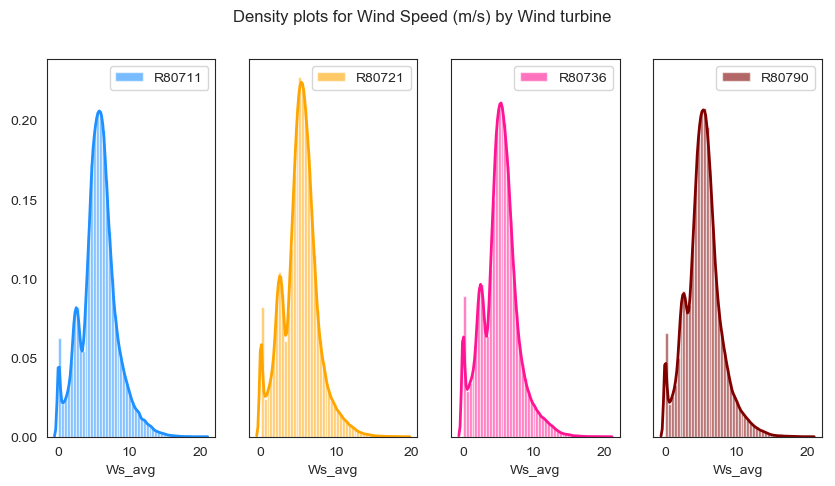

In [199]:
x1 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80711', ['Ws_avg']]
x2 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80721', ['Ws_avg']]
x3 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80736', ['Ws_avg']]
x4 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80790', ['Ws_avg']]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='Ws_avg',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='Ws_avg', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='Ws_avg', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='Ws_avg', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Wind Speed (m/s) by Wind turbine')
plt.savefig('Density plots for Wind Speed by Wind turbine.pdf')

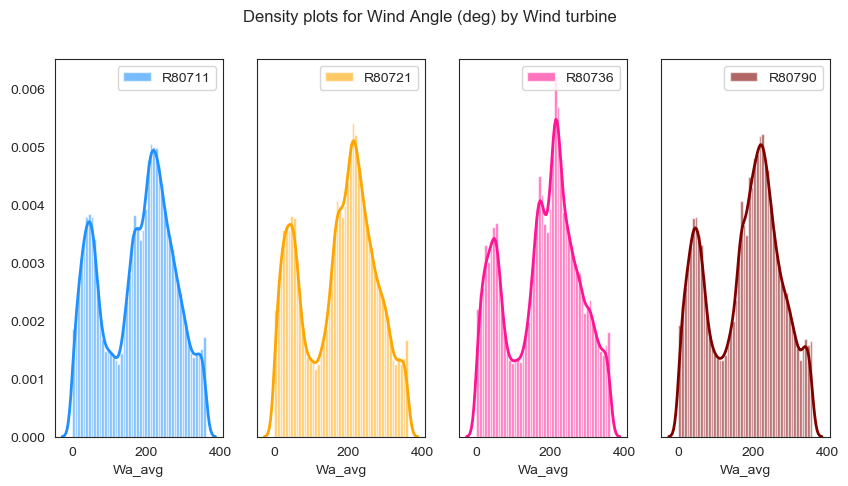

In [201]:
x1 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80711', ['Wa_avg']]
x2 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80721', ['Wa_avg']]
x3 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80736', ['Wa_avg']]
x4 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80790', ['Wa_avg']]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='Wa_avg',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='Wa_avg', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='Wa_avg', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='Wa_avg', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Wind Angle (deg) by Wind turbine')
plt.savefig('Density plots for Wind Angle by Wind turbine.pdf')

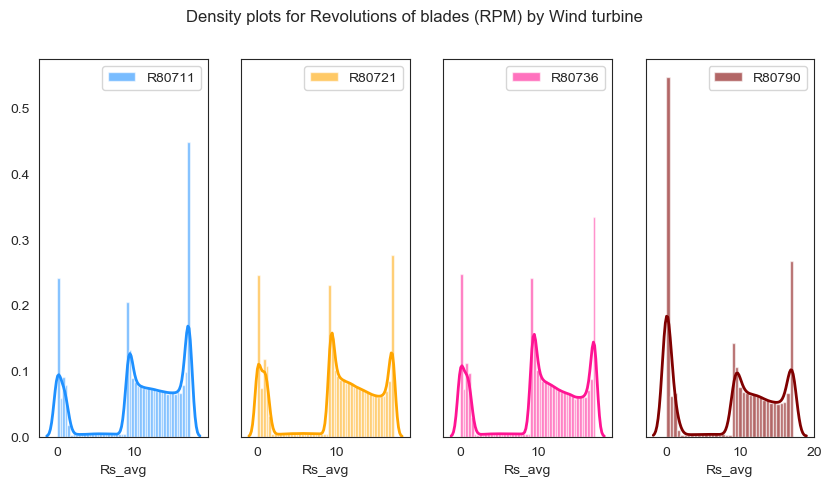

In [203]:
x1 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80711', ['Rs_avg']]
x2 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80721', ['Rs_avg']]
x3 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80736', ['Rs_avg']]
x4 = Basic_Data_drop.loc[Basic_Data_drop.Wind_turbine_name=='R80790', ['Rs_avg']]

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
fig, axes = plt.subplots(1, 4, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1, color="dodgerblue", label="R80711",ax=axes[0], axlabel='Rs_avg',**kwargs)
axes[0].legend()
sns.distplot(x2, color="orange", label="R80721",ax=axes[1], axlabel='Rs_avg', **kwargs)
axes[1].legend()
sns.distplot(x3, color="deeppink", label="R80736",ax=axes[2], axlabel='Rs_avg', **kwargs)
axes[2].legend()
sns.distplot(x4, color="maroon", label="R80790",ax=axes[3], axlabel='Rs_avg', **kwargs)
axes[3].legend();
plt.suptitle('Density plots for Revolutions of blades (RPM) by Wind turbine')
plt.savefig('Density plots for Revolutions of blades by Wind turbine.pdf')

In [89]:
Basic_Data_drop_R80711['Rs_avg'].autocorr()

0.9681672736323601

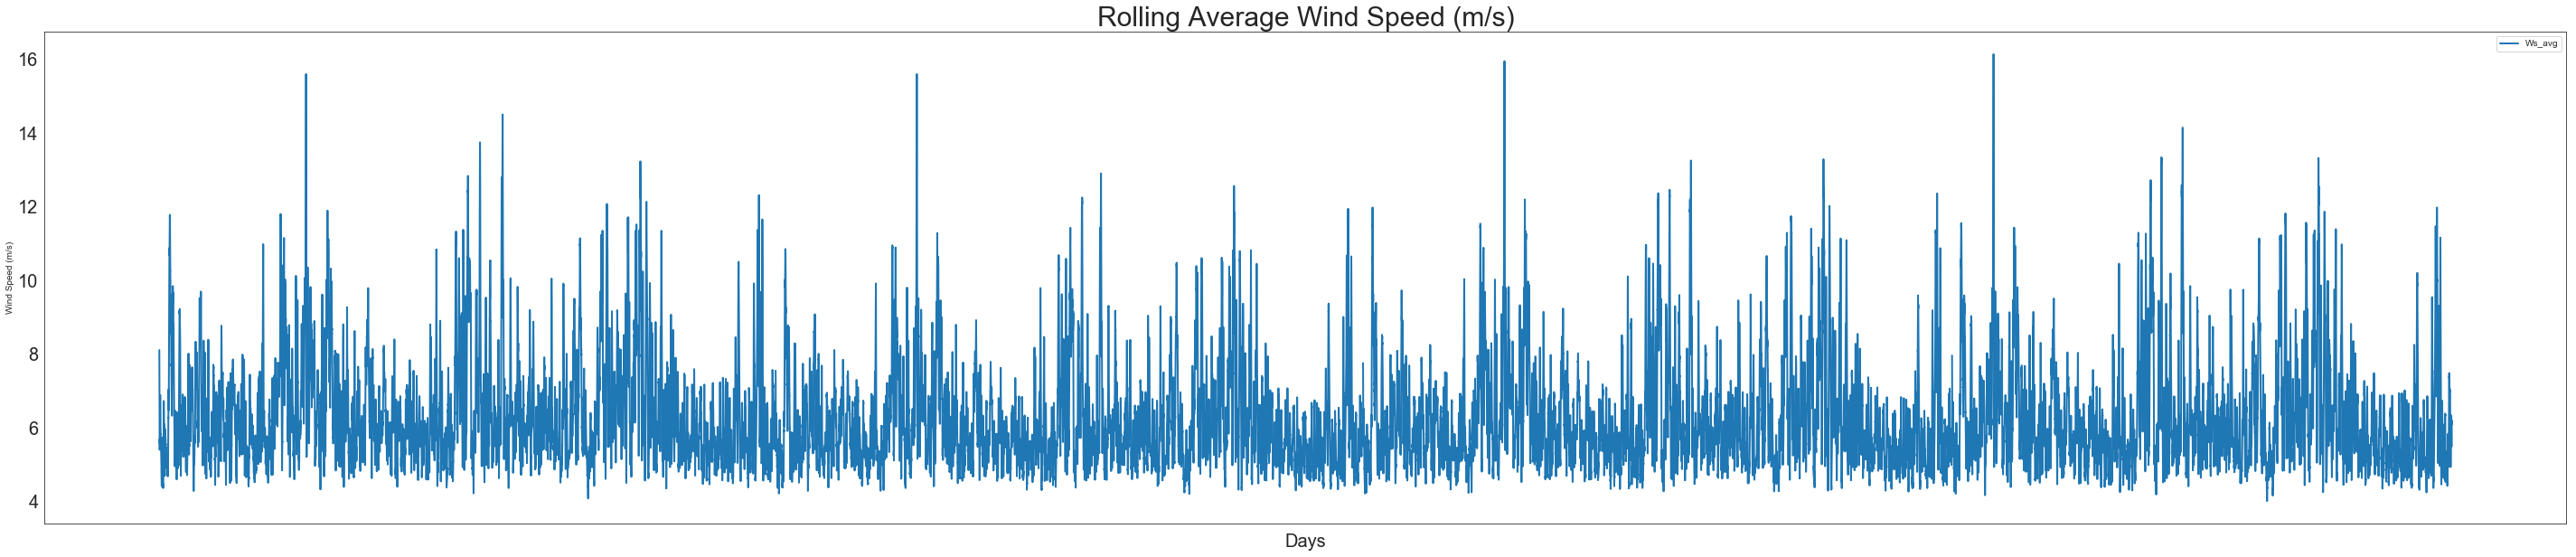

In [103]:
Basic_Data_drop_Group[['Ws_avg']].rolling(144).mean().plot(figsize=(50,10), linewidth=2, fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Wind Speed (m/s)')
plt.title('Rolling Average Wind Speed (m/s)', fontsize = 30)
plt.savefig("Rolling_Average_Wind_Speed_all.pdf");

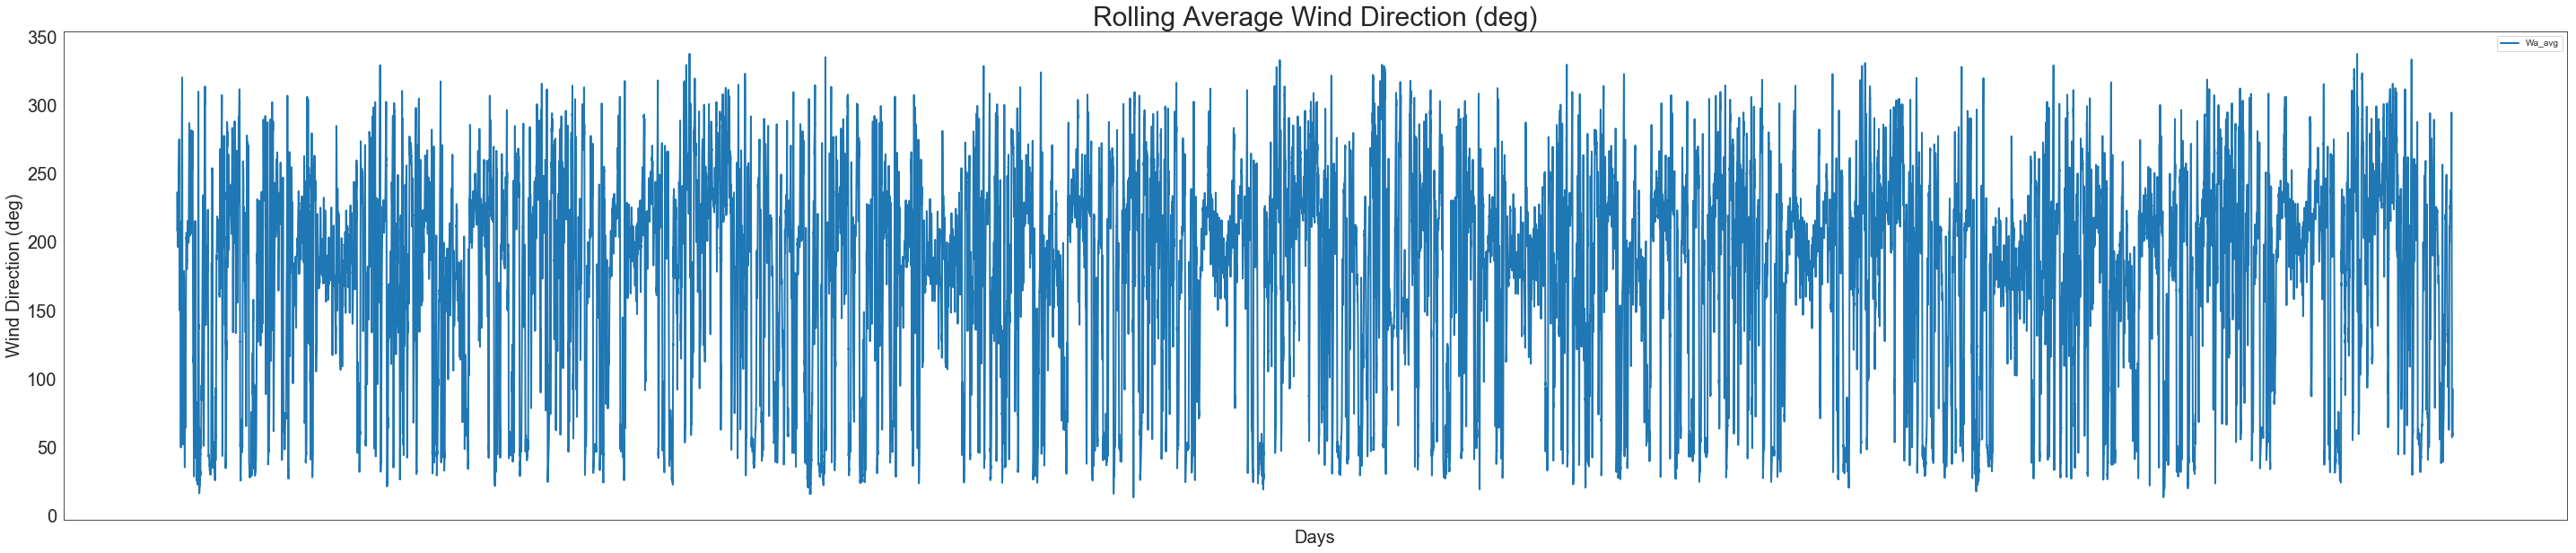

In [104]:
Basic_Data_drop_Group[['Wa_avg']].rolling(144).mean().plot(figsize=(50,10), linewidth=2, fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Wind Direction (deg)', fontsize=20)
plt.title('Rolling Average Wind Direction (deg)', fontsize = 30)
plt.savefig("Rolling_Average_Wind_Direction_all.pdf");

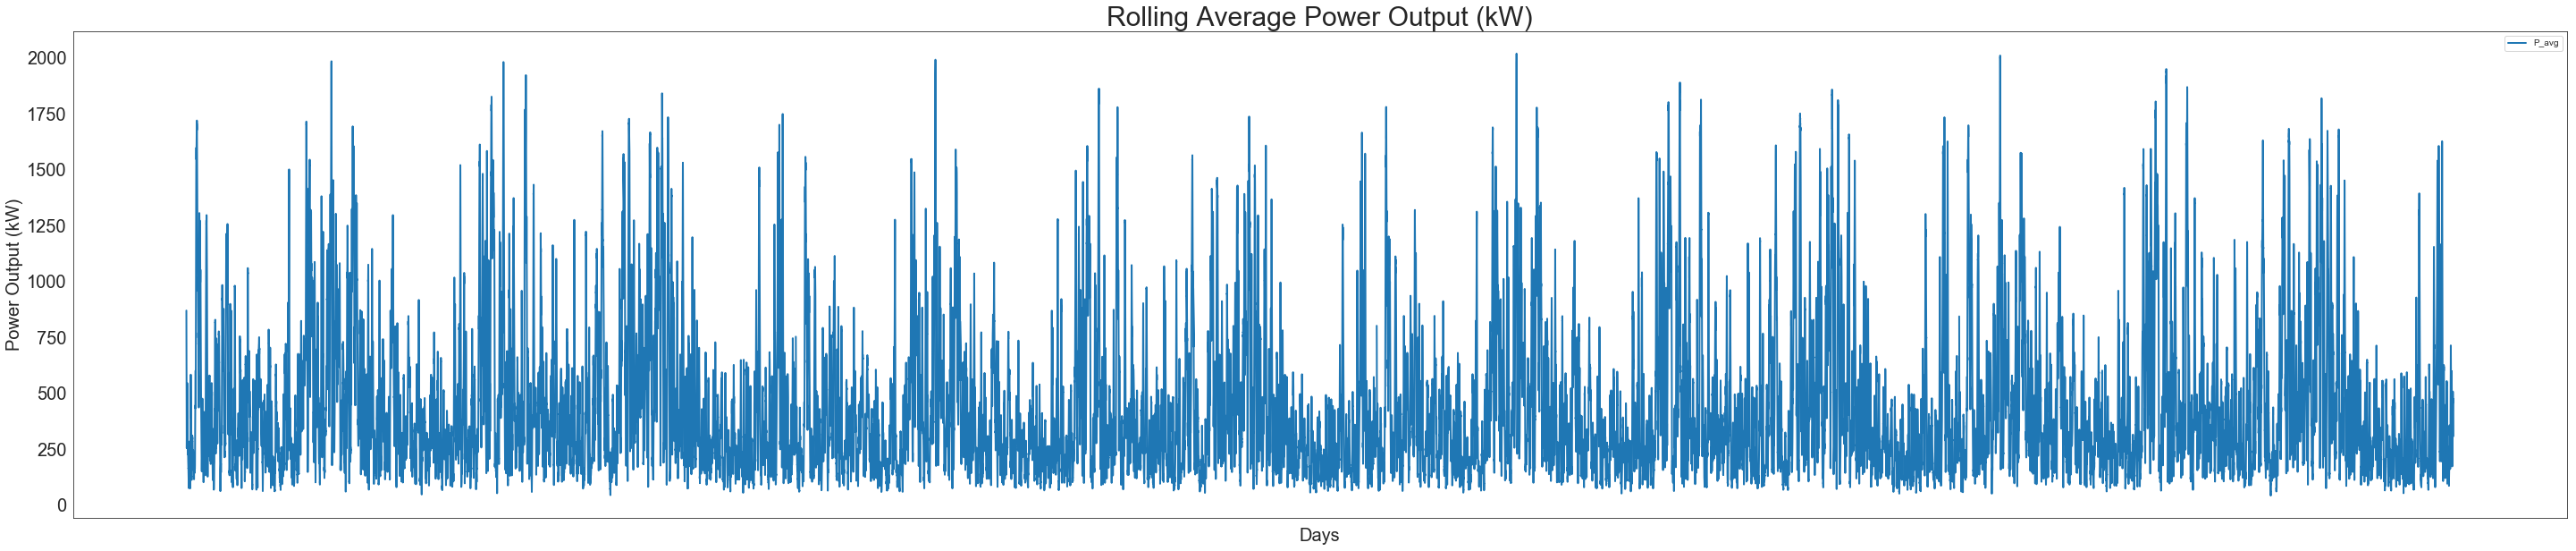

In [105]:
Basic_Data_drop_Group[['P_avg']].rolling(144).mean().plot(figsize=(50,10), linewidth=2, fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Power Output (kW)', fontsize=20)
plt.title('Rolling Average Power Output (kW)', fontsize =30)
plt.savefig("Rolling_Average_Power_Output_all.pdf");

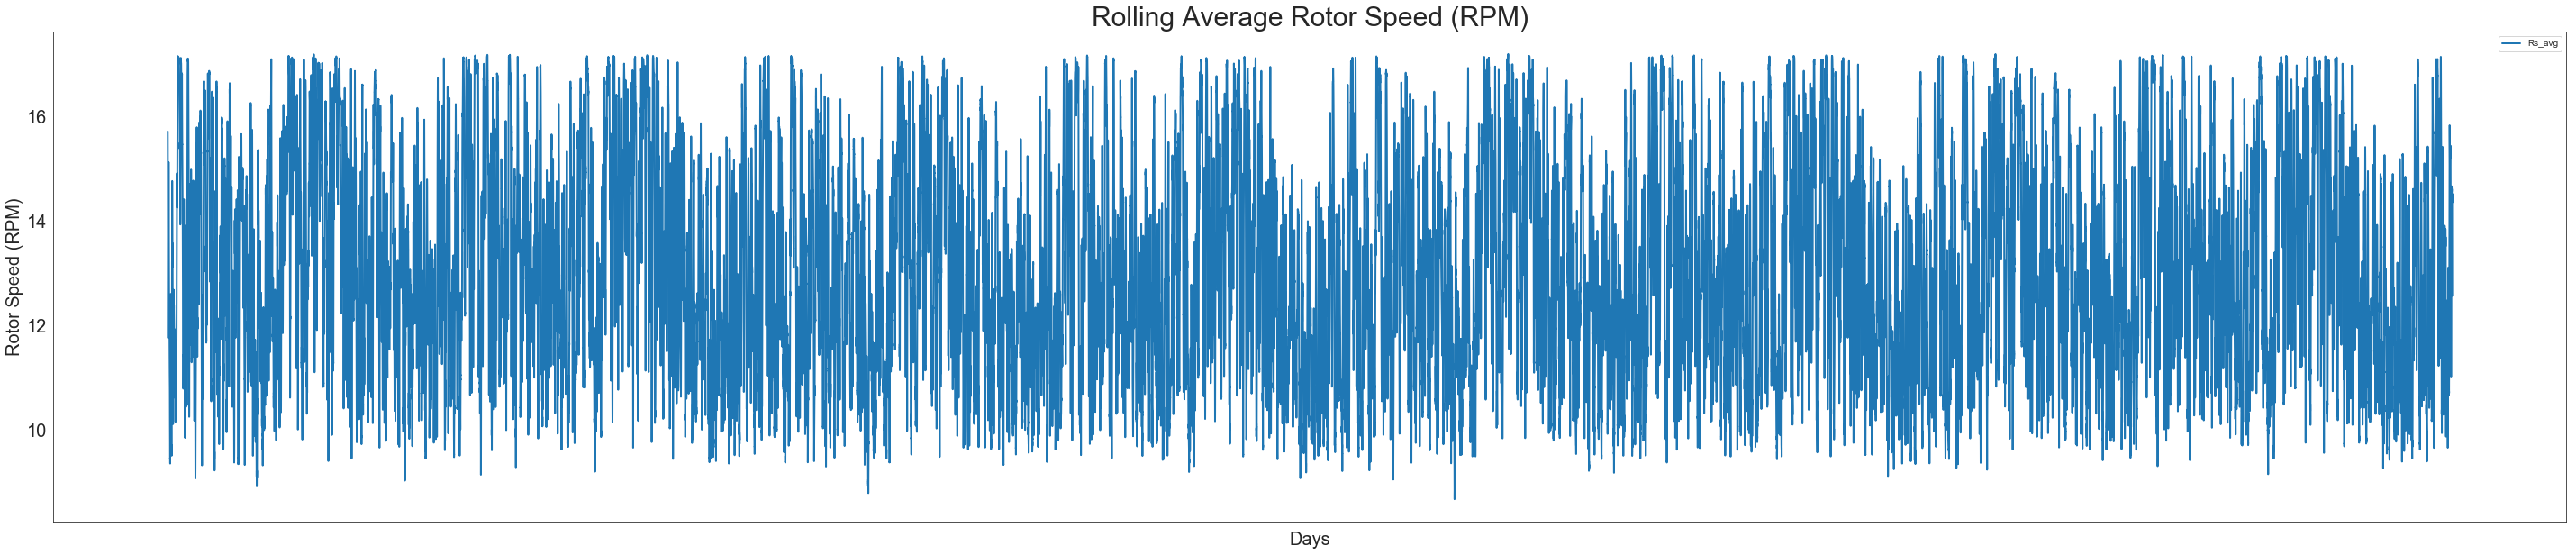

In [106]:
Basic_Data_drop_Group[['Rs_avg']].rolling(144).mean().plot(figsize=(50,10), linewidth=2, fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Rotor Speed (RPM)', fontsize=20)
plt.title('Rolling Average Rotor Speed (RPM)', fontsize = 30)
plt.savefig("Rolling_Average_Rotor_Speed_all.pdf");